# Recieve UDP Packets and Visualize

In [1]:
from scapy.all import get_if_list

def list_interfaces():
    interfaces = get_if_list()
    print("Available network interfaces:")
    for interface in interfaces:
        print(interface)

if __name__ == "__main__":
    list_interfaces()

Available network interfaces:
{81DBAD8C-689F-475B-8591-54D69E10BA9A}
{2A4B31E9-B6E2-471C-A85F-BAEA51690661}
{14732A35-A487-4C35-9A20-97F85400D23A}
{8F72A598-1E86-410B-A098-7188588F7919}
\Device\NPF_Loopback
{85A90889-9038-4080-B018-D64F0C71CB33}


In [6]:
from scapy.all import sniff, ICMP
import numpy as np
import time

def handle_packet(packet):
    """
    Callback function to handle each packet and log the timestamp.
    """
    global timestamps
    timestamps.append(time.time())

def decode_frequencies(timestamps):
    """
    Decode binary data from packet arrival timestamps.
    """
    # Calculate intervals
    intervals = np.diff(timestamps)
    
    # Frequency estimation
    estimated_frequencies = 1 / intervals
    
    # Map frequencies to binary data
    binary_data = ''
    for freq in estimated_frequencies:
        if np.isclose(freq, 1, atol=0.1):
            binary_data += '0'
        elif np.isclose(freq, 2, atol=0.1):
            binary_data += '1'
    
    return binary_data

# List to store packet timestamps
timestamps = []

# Start packet sniffing
print("Starting packet capture...")
sniff(iface='127.0.0.1', filter="icmp", prn=handle_packet, count=100)  # Adjust count based on expected number of packets

# Decode the frequencies after capture
binary_data = decode_frequencies(timestamps)
print(f"Decoded binary data: {binary_data}")

Starting packet capture...


# Listen for UDP Port & Decode

Starting UDP packet capture...
Packet received at 1714619362.053636
Packet received at 1714619365.0598936
Packet received at 1714619367.5676754
Packet received at 1714619370.5804613
Packet received at 1714619373.09425
Packet received at 1714619375.6105428
Packet received at 1714619378.1179886
Packet received at 1714619380.6296937
Packet received at 1714619383.6455388
Packet received at 1714619386.6557772


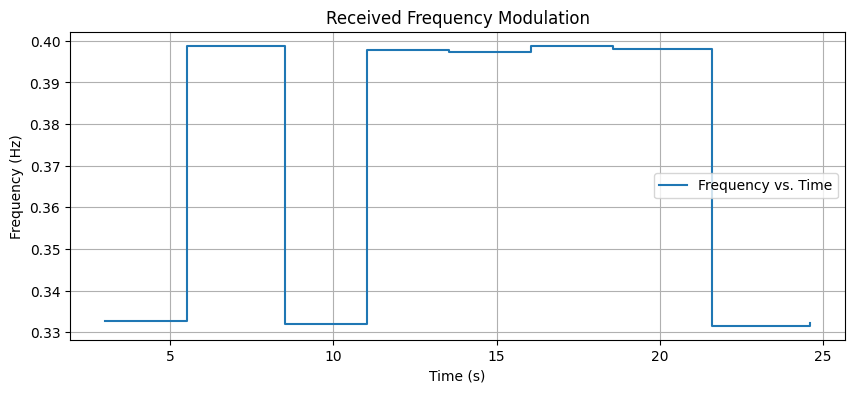

Decoded binary data: 


In [14]:
from scapy.all import sniff, IP, UDP
import numpy as np
import matplotlib.pyplot as plt
import time

timestamps = []  # Global list to store packet timestamps

def handle_packet(packet):
    """ Callback function to handle each received packet and log the timestamp. """
    if packet.haslayer(UDP) and packet[IP].src == expected_src_ip:
        current_time = time.time()
        timestamps.append(current_time)
        print(f"Packet received at {current_time}")

def plot_waveform(timestamps):
    """ Plot the waveform from packet intervals. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    times = np.cumsum(intervals)  # Calculate cumulative times for plotting
    frequencies = 1 / intervals  # Frequency calculation from intervals

    plt.figure(figsize=(10, 4))
    plt.step(times, frequencies, where='post', label='Frequency vs. Time')
    plt.title('Received Frequency Modulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
     # Decoding binary data
    binary_data = ''
    for freq in frequencies:
        if np.isclose(freq, 1, atol=0.1):  # Assuming frequency of '0' is around 1 Hz
            binary_data += '0'
        elif np.isclose(freq, 2, atol=0.1):  # Assuming frequency of '1' is around 2 Hz
            binary_data += '1'

    print("Decoded binary data:", binary_data)

def main():
    # Network configuration
    global expected_src_ip
    expected_src_ip = "192.168.1.155"  # Adjust as necessary
    listen_port = 666  # UDP port to listen on

    # Start packet sniffing
    print("Starting UDP packet capture...")
    sniff(filter=f"udp and port {listen_port}", prn=handle_packet, store=False, count=10)  # Adjust timeout as needed

    # After capture process and plot, ensure there are enough timestamps
    if len(timestamps) > 1:
        plot_waveform(timestamps)

if __name__ == "__main__":
    main()